In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, stats

import warnings
warnings.filterwarnings("ignore")

# Data Airbnb Bangkok
Dataset ini mempunyai sekitar 15.854 data observasi di dalam nya dengan kolom berjumlah 17. Mempunyai data dengan tipe campur antara categorical dan numeric

In [38]:
df_bangkok = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df_bangkok.head(3), df_bangkok.tail(3))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Airbnb Bangkok.

In [39]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_bangkok.shape}')
df_bangkok.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [40]:
display(df_bangkok.describe(), df_bangkok.describe(include='object'), df_bangkok.isnull().sum())

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [41]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df_bangkok.columns :
    listItem.append( [col, df_bangkok[col].nunique(), df_bangkok[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

**Secara umum kita bisa melihat :**
- Dataset airbnb bangkok mempunyai 15.854 baris dan 17 kolom
- Dataset airbnb bangkok juga memiliki kekosongan data pada beberapa kolom yaitu, 'name' , 'last_reviews', 'reviews_per_month'
- kolom 'host_name' akan di hapus beserta kolom 'id', 'Unnamed: 0', 'last_review', 'number_of_reviews_ltm' dikarenakan alasan etis atau tidak dibutuhkan untuk analisa
- kolom 'host_id' memiliki id unique dari setiap host

## MISSING VALUE

In [42]:
# persentase missing value di tiap kolom
df_bangkok.isna().sum()/df_bangkok.shape[0]*100

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

In [43]:
# mencari nama nama kolom

df_bangkok.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

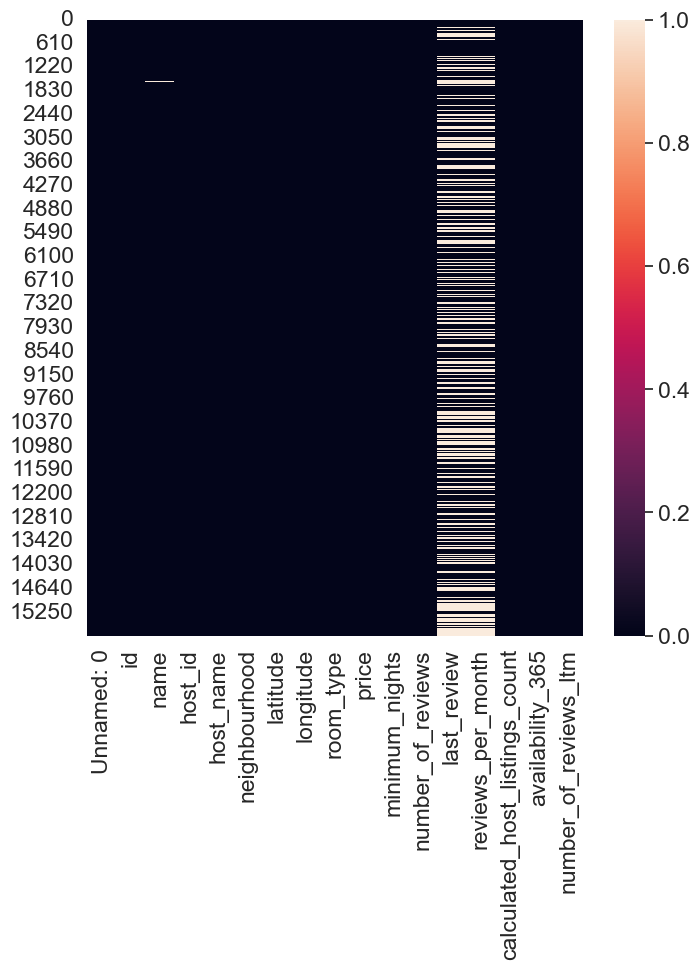

In [44]:
# Sebaran missing value di dalam data
plt.figure(figsize=(8,8))
sns.heatmap(df_bangkok[['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].isna())
plt.show()

Secara garis besar :
- missing value pada kolom 'last_review' dan 'reviews_per_month' memiliki proporsi yang cukup tinggi (>10%), dengan missing value mencapai 36.5%.
- missing value pada kolom 'name' memiliki proporsi yang sangat kecil, bahkan tidak mencapai total 1%.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 36.5%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, mari kita tangani lebih lanjut

In [45]:
# menghapus kolom yang tidak diperlukan untuk analisa

df_bangkok.drop(['id', 'Unnamed: 0', 'last_review', 'number_of_reviews_ltm', 'host_name'], axis='columns', inplace=True)
df_bangkok.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Nice room with superb city view,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353
1,"Easy going landlord,easy place",120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,2,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,1,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,3,365


In [46]:
df_bangkok.duplicated().sum()
df_bangkok.drop_duplicates(inplace=True)

# hapus data duplikasi

In [47]:
for column in df_bangkok.columns:
    if df_bangkok[column].isnull().sum() != 0:
        print(f'{column} > Missing values: {df_bangkok[column].isnull().sum()}')

# mencari missing value


name > Missing values: 8
reviews_per_month > Missing values: 5783


In [48]:
# mengisi kolom 'reviews_per_month' dengan (0)

df_bangkok.fillna({'reviews_per_month':0}, inplace=True)
df_bangkok.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Nice room with superb city view,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353
1,"Easy going landlord,easy place",120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365


In [49]:
for column in df_bangkok.columns:
    if df_bangkok[column].isnull().sum() != 0:
        print(f'{column} > Missing values: {df_bangkok[column].isnull().sum()}')

name > Missing values: 8


In [50]:
df_bangkok.fillna({'name':'N/A'}, inplace=True)
df_bangkok.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Nice room with superb city view,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353
1,"Easy going landlord,easy place",120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365


In [51]:
df_bangkok.isnull().sum()

name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Data sudah bersih dari nilai NaN, mari kita lihat sekilas dataset nya

In [52]:
listItem = []
for col in df_bangkok.columns :
    listItem.append([col, df_bangkok[col].dtype, df_bangkok[col].isna().sum(),
                    df_bangkok[col].nunique(), list(df_bangkok[col].sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_bangkok.shape)
dfDesc

(15847, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14795,"[Pinklao/ Local area/Foody is around, Home Away from Home, Sukhumvit-Asoke]"
1,host_id,int64,0,6659,"[37749512, 79188226]"
2,neighbourhood,object,0,50,"[Khlong Toei, Bang Kapi]"
3,latitude,float64,0,9606,"[13.74004, 13.71237]"
4,longitude,float64,0,10224,"[100.60667, 100.72675]"
5,room_type,object,0,4,"[Entire home/apt, Private room]"
6,price,int64,0,3040,"[5000, 850]"
7,minimum_nights,int64,0,86,"[1, 1]"
8,number_of_reviews,int64,0,298,"[2, 1]"
9,reviews_per_month,float64,0,514,"[0.89, 0.0]"


In [53]:
df_bangkok.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.584700e+04,15847.000000,15847.000000,1.584700e+04,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000
mean,1.540793e+08,13.745135,100.559910,3.218274e+03,15.298416,16.661513,0.516406,13.884142,244.341390
std,1.318671e+08,0.043024,0.050917,2.497762e+04,50.825421,40.620792,0.952902,30.273660,125.851924
min,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000
50%,1.224556e+08,13.738490,100.561420,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000
75%,2.389444e+08,13.759495,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000


In [54]:
# menghapus value data dengan 'price' == 0 dan 'availability_365' == 0

indexairbnb_0 = df_bangkok[(df_bangkok['price'] == 0) | (df_bangkok['availability_365'] == 0)].index
df_bangkok.drop(indexairbnb_0, inplace=True)

In [55]:
listItem = []
for col in df_bangkok.columns :
    listItem.append([col, df_bangkok[col].dtype, df_bangkok[col].isna().sum(),
                    df_bangkok[col].nunique(), list(df_bangkok[col].sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_bangkok.shape)
dfDesc

(14990, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14054,"[Studio Superior- Hotel Right next to BTS Station Sukhumvit Line, Samutprakarn, Place for slow life]"
1,host_id,int64,0,6370,"[41894494, 217711917]"
2,neighbourhood,object,0,50,"[Phra Khanong, Vadhana]"
3,latitude,float64,0,9275,"[13.8089, 13.73848]"
4,longitude,float64,0,9893,"[100.49856, 100.52517]"
5,room_type,object,0,4,"[Entire home/apt, Entire home/apt]"
6,price,int64,0,2937,"[1364, 969]"
7,minimum_nights,int64,0,85,"[30, 1]"
8,number_of_reviews,int64,0,296,"[14, 0]"
9,reviews_per_month,float64,0,514,"[0.29, 0.0]"


In [56]:
df_bangkok.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.499000e+04,14990.000000,14990.000000,1.499000e+04,14990.000000,14990.000000,14990.000000,14990.000000,14990.00000
mean,1.543645e+08,13.744949,100.559977,3.259530e+03,15.503803,16.812475,0.529536,13.189460,258.31074
std,1.326551e+08,0.043300,0.051122,2.563798e+04,50.729481,41.038308,0.971019,27.674126,114.61071
min,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,1.00000
25%,3.877233e+07,13.719810,100.529790,9.000000e+02,1.000000,0.000000,0.000000,1.000000,161.00000
50%,1.223632e+08,13.738090,100.561360,1.443500e+03,1.000000,2.000000,0.090000,4.000000,321.00000
75%,2.403435e+08,13.759042,100.585318,2.424000e+03,7.000000,13.000000,0.710000,13.000000,361.00000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1115.000000,1224.000000,19.130000,228.000000,365.00000


sebelum dibersihkan, data mempunyai 15.854 baris dan 17 kolom. setelah dibersihkan, data mempunyai 14.990 baris dan 12 kolom. sekitar 864 baris dan 5 kolom yang di hapus

In [84]:
df_bangkok.to_csv("airbnb_bangkok_df_dc.csv", index=False)

# import data yang sudah di clean menjadi data csv

# Visualisasi dan Analisa Data
mari mulai melakukan visualisasi

### TOP 5 HOSTS 
*(visualized)*

In [58]:
# mencari top host

top_host = df_bangkok.host_id.value_counts().head(5)
top_host

201677068    168
26736483     83 
52161947     79 
228535635    62 
68154488     62 
Name: host_id, dtype: int64

In [59]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,201677068,168
1,26736483,83
2,52161947,79
3,228535635,62
4,68154488,62


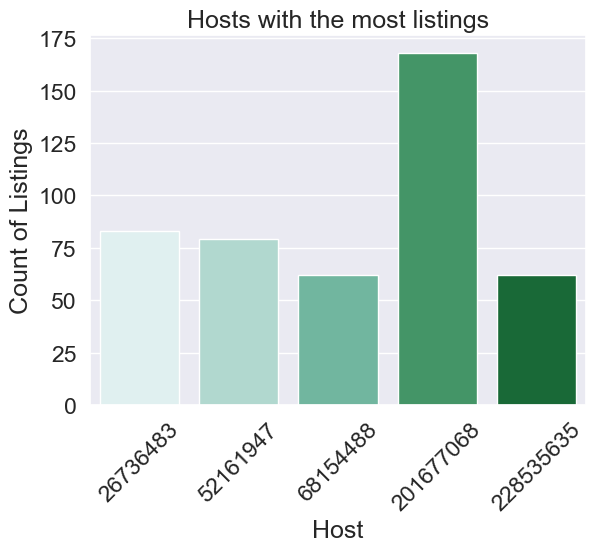

In [60]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='BuGn')
viz_1.set_title('Hosts with the most listings')
viz_1.set_ylabel('Count of Listings')
viz_1.set_xlabel('Host')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)
plt.show() ;

### LEAST 5 HOSTS 
*(not - visualized)*

In [61]:
# mencari least (5) host
least_host = df_bangkok.host_id.value_counts().tail(5)
least_host

32884023     1
164391680    1
138581197    1
134836006    1
94899359     1
Name: host_id, dtype: int64

### TOP 5 NEIGHBOURHOOD 
*(visualized)*

In [62]:
top_neighbourhood = df_bangkok.neighbourhood.value_counts().head(5)
top_neighbourhood

# Melihat Top 5 dari 'Neighborhood' 

Vadhana        2040
Khlong Toei    2023
Ratchathewi    1064
Huai Khwang    970 
Sathon         781 
Name: neighbourhood, dtype: int64

In [63]:
top_neighbourhood_df = pd.DataFrame(top_neighbourhood)
top_neighbourhood_df.reset_index(inplace=True)
top_neighbourhood_df.rename(columns={'index':'neighbourhood', 'neighbourhood':'P_Count'}, inplace=True)
top_neighbourhood_df

,neighbourhood,P_Count
0,Vadhana,2040
1,Khlong Toei,2023
2,Ratchathewi,1064
3,Huai Khwang,970
4,Sathon,781


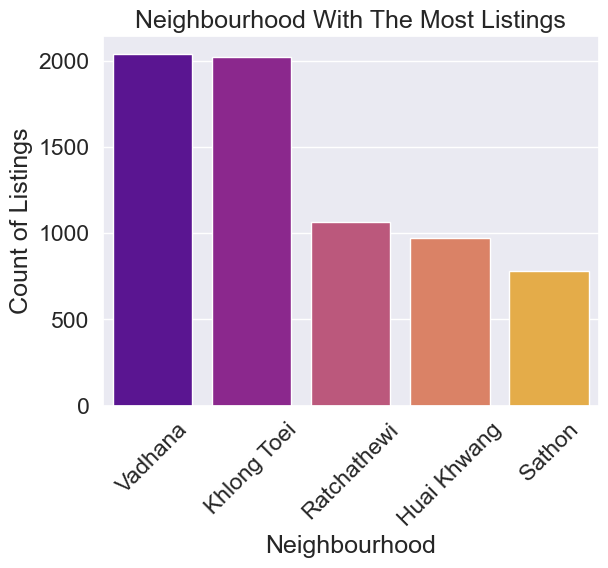

In [73]:
viz_2=sns.barplot(x="neighbourhood", y="P_Count", data=top_neighbourhood_df,
                 palette='plasma')
viz_2.set_title('Neighbourhood With The Most Listings')
viz_2.set_ylabel('Count of Listings')
viz_2.set_xlabel('Neighbourhood')
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=45)
plt.show() ;

### LEAST 5 NEIGHBOURHOOD 
*(visualized)*

In [71]:
# mencari neighbourhood dengan listing paling dikit

least_neighbourhood = df_bangkok.neighbourhood.value_counts().tail(5)
least_neighbourhood

Thung khru        20
Nong Chok         14
Thawi Watthana    11
Nong Khaem        9 
Bang Bon          5 
Name: neighbourhood, dtype: int64

In [72]:
least_neighbourhood_df = pd.DataFrame(least_neighbourhood)
least_neighbourhood_df.reset_index(inplace=True)
least_neighbourhood_df.rename(columns={'index':'neighbourhood', 'neighbourhood':'P_Count'}, inplace=True)
least_neighbourhood_df

,neighbourhood,P_Count
0,Thung khru,20
1,Nong Chok,14
2,Thawi Watthana,11
3,Nong Khaem,9
4,Bang Bon,5


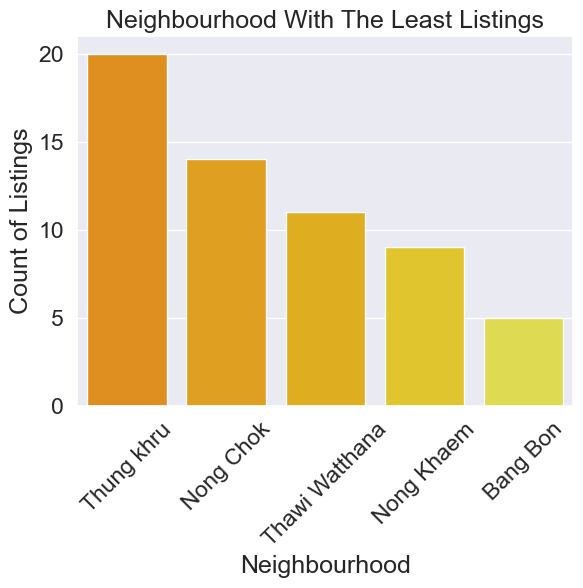

In [83]:
viz_3=sns.barplot(x="neighbourhood", y="P_Count", data=least_neighbourhood_df,
                 palette='Wistia_r')
viz_3.set_title('Neighbourhood With The Least Listings')
viz_3.set_ylabel('Count of Listings')
viz_3.set_xlabel('Neighbourhood')
viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=45)
plt.show() ;

### MENCARI TIPE KAMAR YANG POPULER DI LISTING

*(visualized*)

In [86]:
tipe_kamar = df_bangkok.room_type.value_counts()
tipe_kamar

Entire home/apt    8400
Private room       5517
Hotel room         567 
Shared room        506 
Name: room_type, dtype: int64

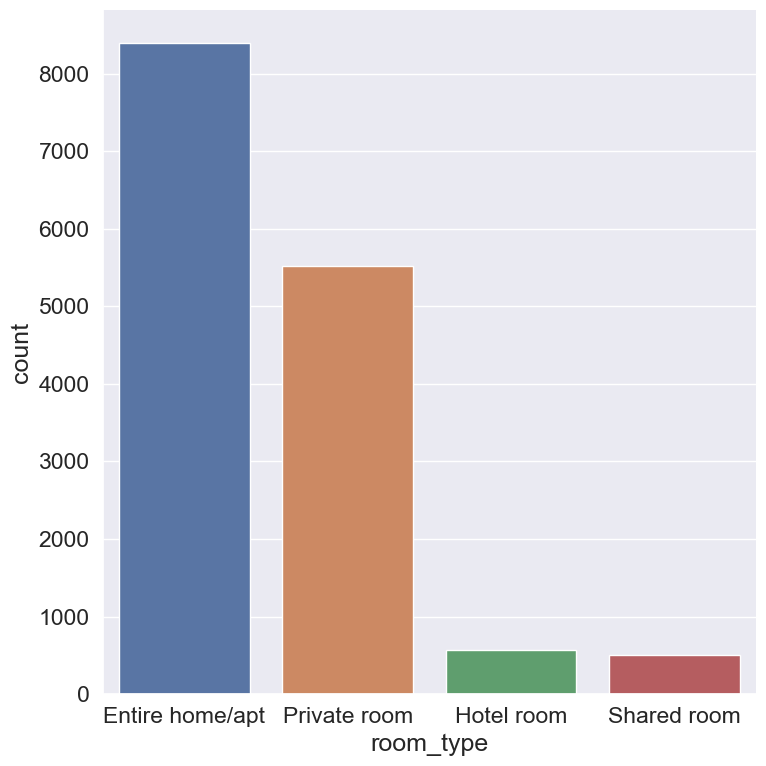

In [65]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=df_bangkok, kind="count", height=8)
plt.show();


- 5 DAERAH DENGAN LISTINGS TERBANYAK ('Vadhana', 'Khlong Toei', 'Ratchathewi', 'Huai Khwang', 'Sathon')
- Daerah 'Vadhana' dan 'Khlong Toei' mempunyai banyak nya listing hampir sama
- Kebanyakan dari listing yang ada merupakan tipe 'Entire home/apt'
- Sedikit nya listing yang mempuyai tipe yang 'Hotel room' dan 'Shared room'

### mari kita lihat penyebaran tipe kamar

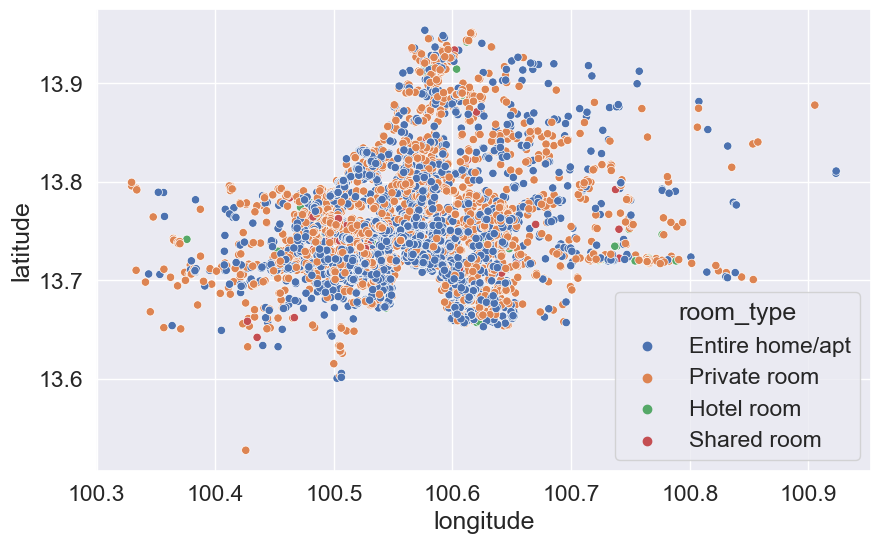

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_bangkok.longitude,df_bangkok.latitude,hue=df_bangkok.room_type)
plt.ioff()
plt.show();

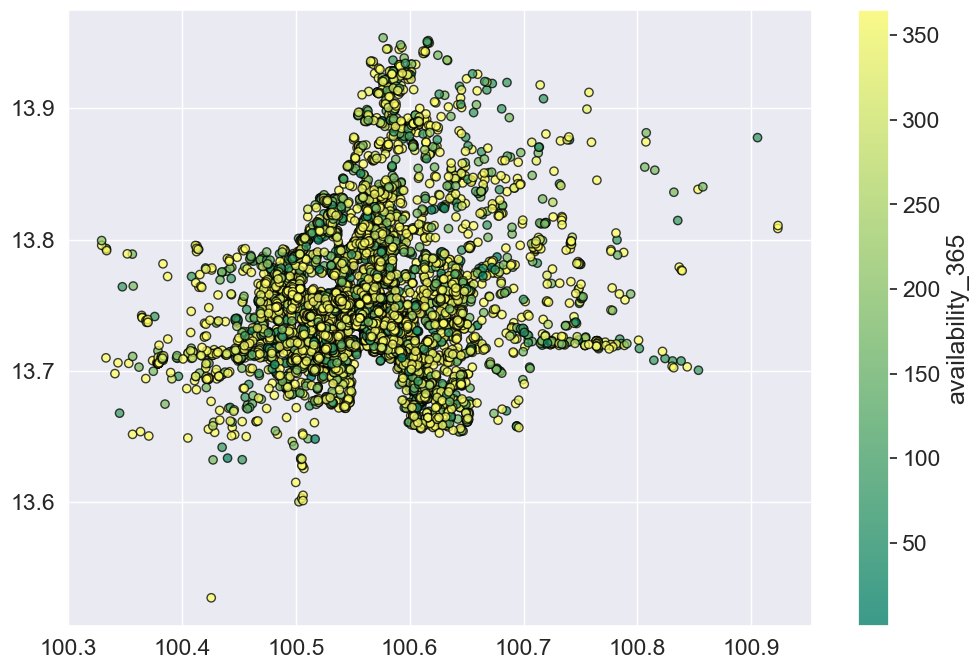

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(df_bangkok.longitude, df_bangkok.latitude, c=df_bangkok.availability_365, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')
plt.xlabel("")
plt.show()

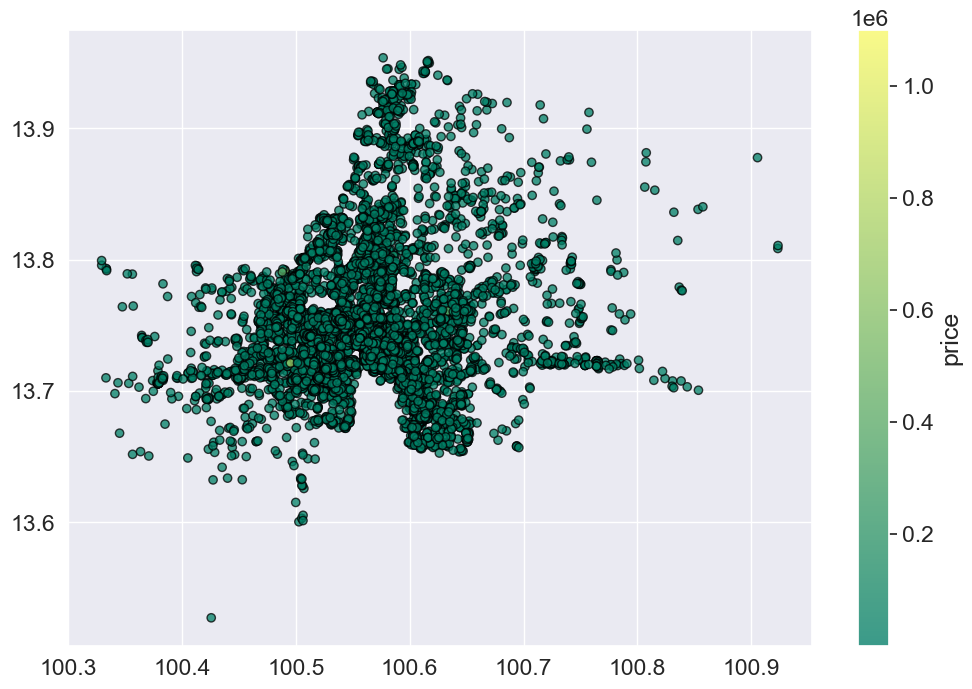

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(df_bangkok.longitude, df_bangkok.latitude, c=df_bangkok.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('price')
plt.show()

In [69]:
print(f"Average of price per night : ${df_bangkok.price.mean()}")
print(f"Maximum price per night : ${df_bangkok.price.max()}")
print(f"Minimum price per night : ${df_bangkok.price.min()}")

Average of price per night : $3259.5299533022016
Maximum price per night : $1100000
Minimum price per night : $278


## KESIMPULAN DAN REKOMENDASI

Dari visualisasi yang sudah dilakukan, bahwa dataset airbnb bangkok mempunyai keragaman yang mendalam, 
namun tidak perlu melakukan koreksi maupun penghapusan data yang berlebih.

1. pertama, kita bisa melihat host mana yang memanfaat kan platform airbnb ini dengan maksimal, dan mempunyai cukup banyaknya listing. Top host kita yang ber ID '201677068', mempunyai total 168 listing.
2. kedua, kita bisa menganalisa dan melihat 'neighbourhood' mana saja yang memiliki kepadatan yang lebih, dan memiliki popularitas yang lebih dari 'neighbourhood' lain. 'Vadhana' mempunyai kepadatan listing urutan pertama
3. ketiga, kita juga melakukan data visual menggunakan scatterplot, yang bisa memudahkan kita melihat kepadatan dari sebuah data.
4. keempat, setelah kita liat data 'room_type', ternyata listing terbanyak merupakan listing dengan type 'entire home/apt', di posisi kedua ada 'private room'

## REKOMENDASI

1. Melakukan filterisasi terhadap listing yang 'dilihat' tidak aktif
    - seperti listing yang mempunyai 'number_of_reviews' dan 'calculated_host_listings_count' yang sedikit atau mendekati null
